## 케글 타이타닉 연습

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

import scipy

# 결측치 시각화 패키지
import missingno as msno

import re
import os

plt.style.use("seaborn")
sns.set(font_scale = 2.5)

warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [5]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# : > 은 padding을 왼쪽에, 문자열을 오른쪽에 정렬하는 방법
# : <(생략) 은 padding을 오른쪽에, 문자열을 왼쪽에 정렬하는 방법
for col in train.columns:
    percent = train[col].isnull().sum() / train.shape[0]
    percent = round(percent * 100, 2)
    msg = f'columns : {col : >10}\t Percent of NaN value : {percent}%'
    print(msg)

columns : PassengerId	 Percent of NaN value : 0.0%
columns :   Survived	 Percent of NaN value : 0.0%
columns :     Pclass	 Percent of NaN value : 0.0%
columns :       Name	 Percent of NaN value : 0.0%
columns :        Sex	 Percent of NaN value : 0.0%
columns :        Age	 Percent of NaN value : 19.87%
columns :      SibSp	 Percent of NaN value : 0.0%
columns :      Parch	 Percent of NaN value : 0.0%
columns :     Ticket	 Percent of NaN value : 0.0%
columns :       Fare	 Percent of NaN value : 0.0%
columns :      Cabin	 Percent of NaN value : 77.1%
columns :   Embarked	 Percent of NaN value : 0.22%


In [19]:
# : > 은 padding을 왼쪽에, 문자열을 오른쪽에 정렬하는 방법
# : <(생략) 은 padding을 오른쪽에, 문자열을 왼쪽에 정렬하는 방법
for col in test.columns:
    percent = test[col].isnull().sum() / test.shape[0]
    percent = round(percent * 100, 2)
    msg = f'columns : {col : >10}\t Percent of NaN value : {percent}%'
    print(msg)

columns : PassengerId	 Percent of NaN value : 0.0%
columns :     Pclass	 Percent of NaN value : 0.0%
columns :       Name	 Percent of NaN value : 0.0%
columns :        Sex	 Percent of NaN value : 0.0%
columns :        Age	 Percent of NaN value : 20.57%
columns :      SibSp	 Percent of NaN value : 0.0%
columns :      Parch	 Percent of NaN value : 0.0%
columns :     Ticket	 Percent of NaN value : 0.0%
columns :       Fare	 Percent of NaN value : 0.24%
columns :      Cabin	 Percent of NaN value : 78.23%
columns :   Embarked	 Percent of NaN value : 0.0%


<AxesSubplot:>

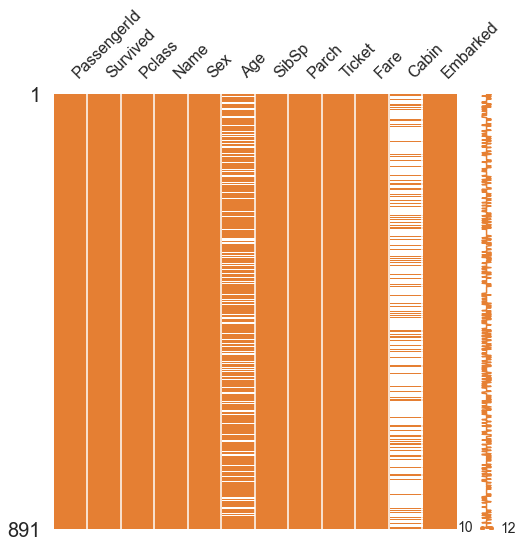

In [13]:
msno.matrix(df = train.iloc[:, :], figsize = (8, 8), color=( 0.9, 0.5, 0.2))

<AxesSubplot:>

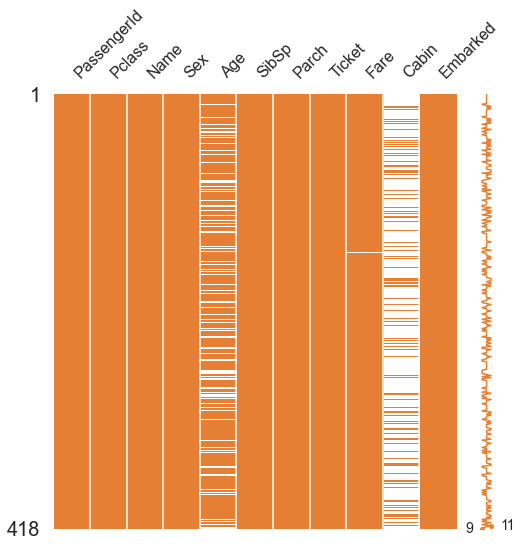

In [20]:
msno.matrix(df = test.iloc[:, :], figsize = (8, 8), color=( 0.9, 0.5, 0.2))

### 1.2 Target label 확인

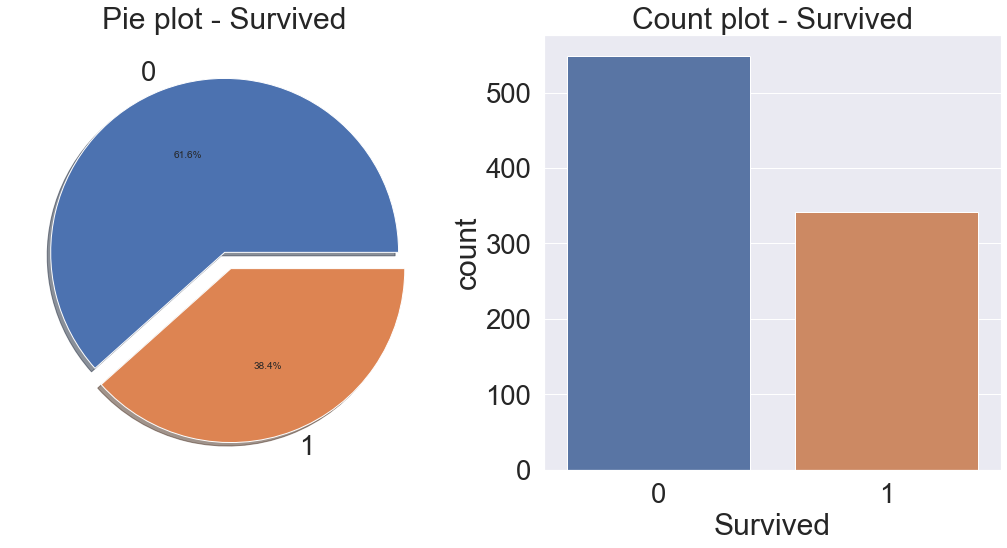

In [28]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))

train['Survived'].value_counts().plot.pie(explode=[0, 0.1], 
                                          autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Pie plot - Survived")
ax[0].set_ylabel("")
sns.countplot("Survived", data = train, ax = ax[1])
ax[1].set_title("Count plot - Survived")

plt.show()

## 2. EDA
### 2.1 Pclass

In [35]:
# as_index = False : groupby의 집단을 index로 사용 안하고 column화 할때 사용
train[["Pclass", "Survived"]].groupby("Pclass", as_index = False).agg(["count", "sum"])

Survived     
          count  sum
Pclass              
1           216  136
2           184   87
3           491  119

In [37]:
# pd.crosstab(index, value) : index를 기준으로 value의 빈도를 구할때 사용
# margins = True : 교차표의 행 합, 열 합 추가
# normalize = True : 구성비율로 교차표 
pd.crosstab(train["Pclass"], train["Survived"], margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 1.02, 'Pclass : Survived Vs Dead')

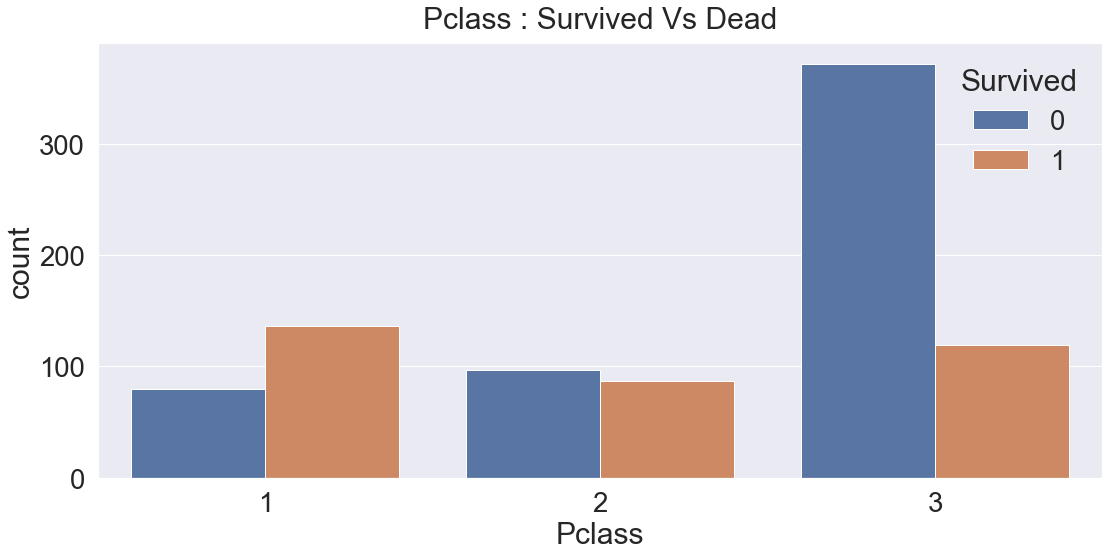

In [42]:
fig = plt.subplots(figsize = (18, 8))
sns.countplot("Pclass", hue = "Survived", data = train)
plt.title("Pclass : Survived Vs Dead", y = 1.02)

### 2.2 Sex

Text(0.5, 1.0, 'Sex : Survived vs Dead')

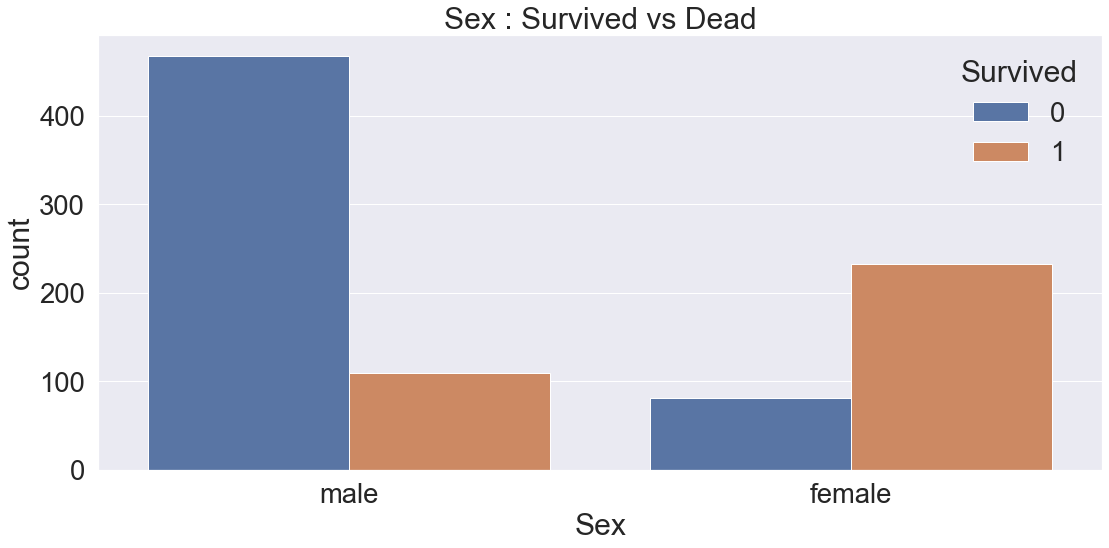

In [43]:
fig = plt.subplots(figsize = (18, 8))
sns.countplot("Sex", hue = 'Survived', data = train)
plt.title("Sex : Survived vs Dead")

In [44]:
pd.crosstab(train["Sex"], train["Survived"], margins = True).style.background_gradient(cmap = "summer_r")

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


### 2.3 Both Sx and Pclass

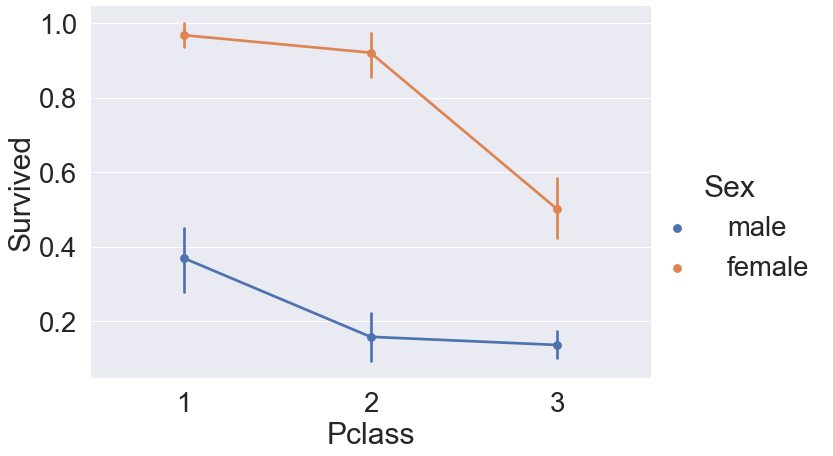

In [48]:
sns.factorplot("Pclass", "Survived", hue = "Sex", data = train,
              size = 6, aspect = 1.5)

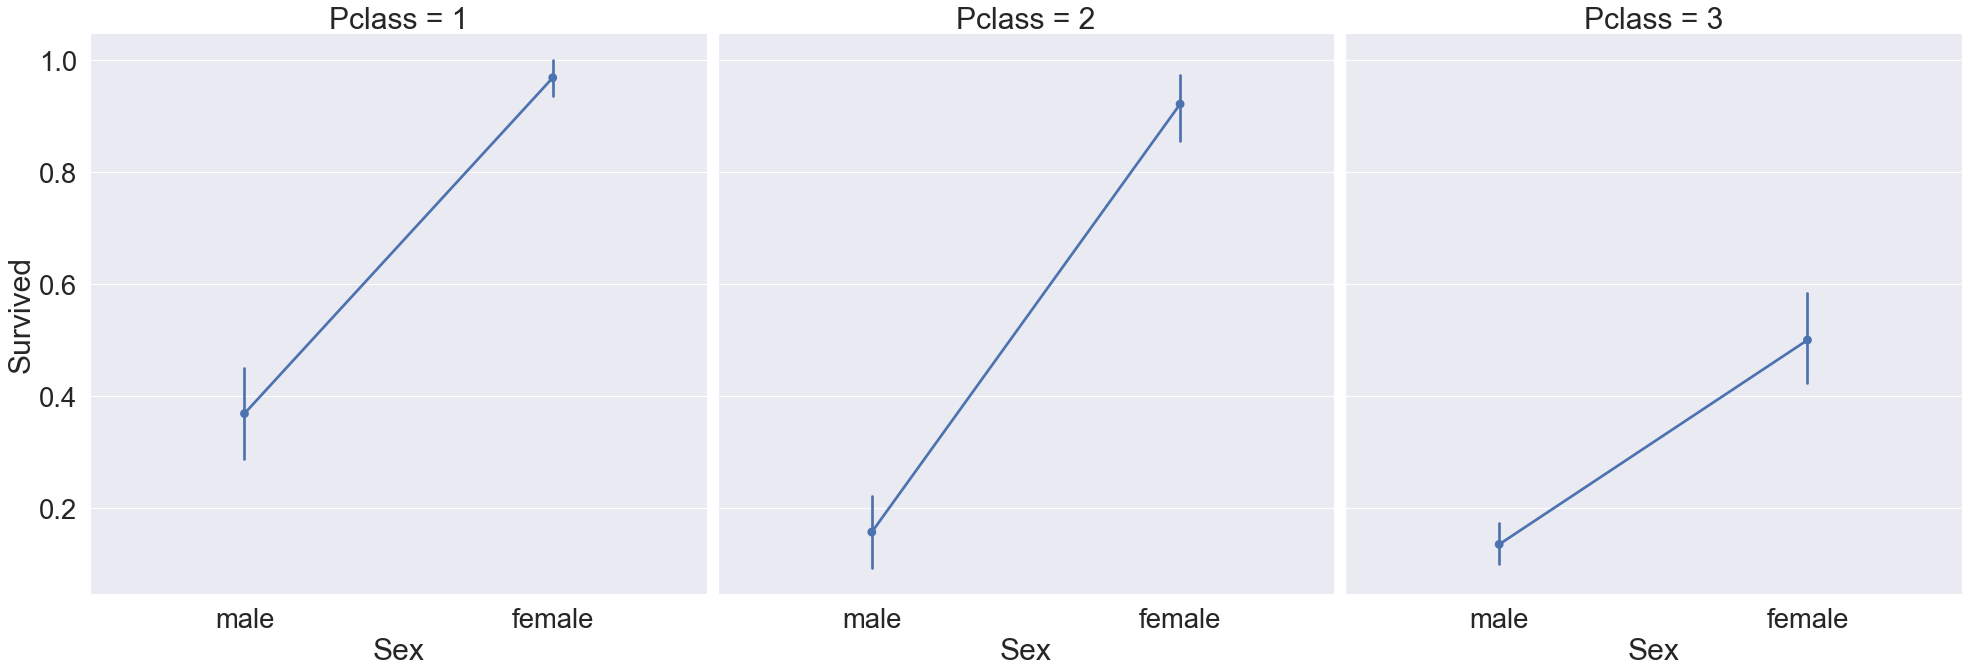

In [52]:
sns.factorplot("Sex", "Survived", col = "Pclass", data = train, satureation = .5,
              size = 9, aspect = 1)

### 2.4 Age

In [67]:
print(f"제일 나이 많은 탑승객 : {train.Age.max()}Years")
print(f"제일 어린 탐승객 : {train.Age.min()}Years")
print(f"탑승객 평균 나이 : {round(train.Age.mean(), 1)}Years")

제일 나이 많은 탑승객 : 80.0Years
제일 어린 탐승객 : 0.42Years
탑승객 평균 나이 : 29.7Years


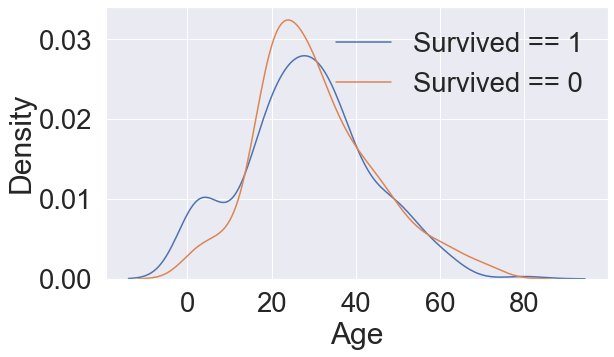

In [72]:
# 생존에 따른 Age의 histogram
fig = plt.subplots(figsize = (9,5))
sns.kdeplot(train[train["Survived"] == 1]["Age"])
sns.kdeplot(train[train["Survived"] == 0]["Age"])
plt.legend(["Survived == 1", "Survived == 0"])

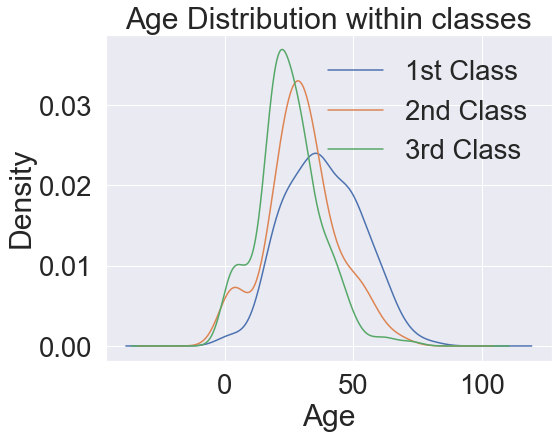

In [76]:
# Age distribution withing classes
plt.figure(figsize = (8,6))
train["Age"][train["Pclass"] == 1].plot(kind = "kde")
train["Age"][train["Pclass"] ==2].plot(kind = "kde")
train["Age"][train["Pclass"] ==3].plot(kind = "kde")

plt.xlabel("Age")
plt.title("Age Distribution within classes")
plt.legend(["1st Class", "2nd Class", "3rd Class"])

Text(0.5, 0, 'Range of Age (0 ~ x)')

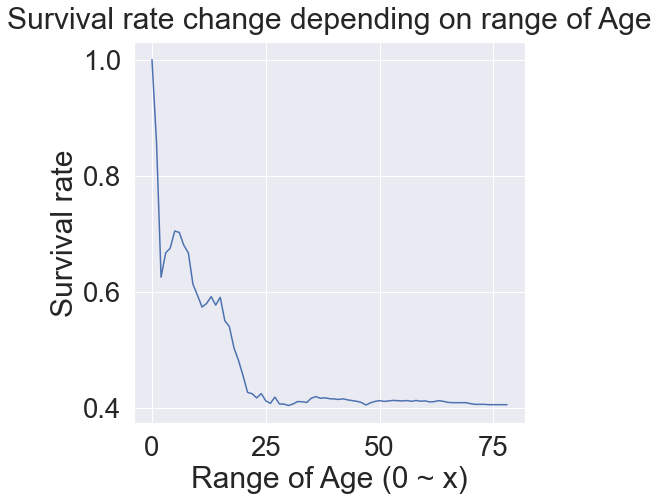

In [83]:
# 상대도수(relative frequency) : 해당 계급의 데이터가 어느 정도의 비율을 차지하고 있는지
# 누적상대도수(cumulative relative frequency) : 해당 계급까지의 상대도수의 합

cummulate_survival_ratio = []
cummulate_survival = []

for i in range(1, 80):
    data = train[train["Age"] < i]["Survived"].sum() / len(train[train["Age"] < i]["Survived"])
    cummulate_survival_ratio.append(data)
    
plt.figure(figsize = (7, 7))
plt.plot(cummulate_survival_ratio)
plt.title("Survival rate change depending on range of Age", y = 1.02)
plt.ylabel("Survival rate")
plt.xlabel("Range of Age (0 ~ x)")

### 2.5 Pclass, Sex, Age

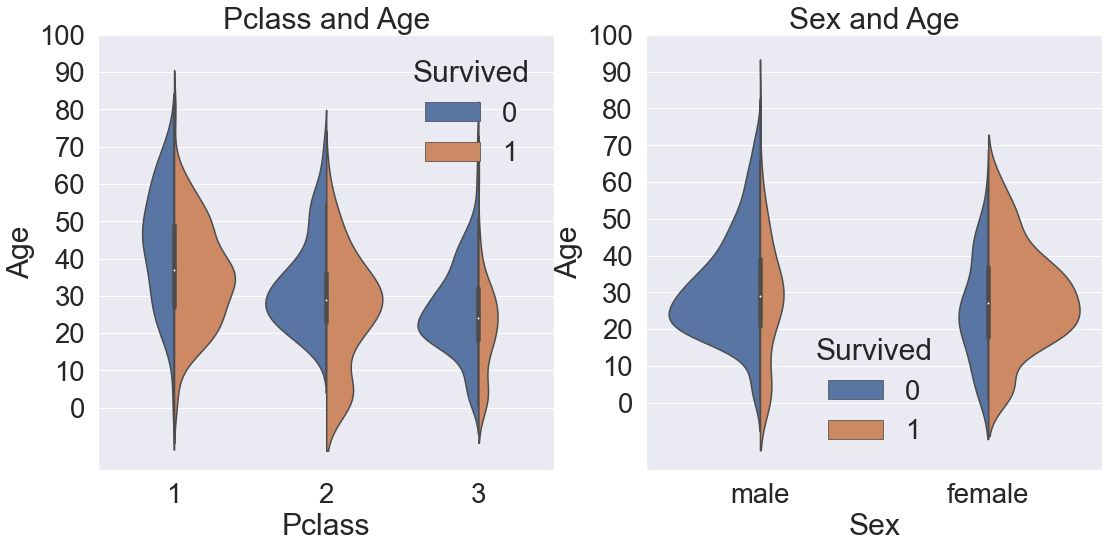

In [88]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot("Pclass", "Age", hue = "Survived", data = train,
              scale = "count", split = True, ax = ax[0])
ax[0].set_title("Pclass and Age")
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex", "Age", hue = "Survived", data = train,
              scale = "count", split = True, ax = ax[1])
ax[1].set_title("Sex and Age")
ax[1].set_yticks(range(0, 110, 10))
plt.show()

### 2.6 Embarked

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

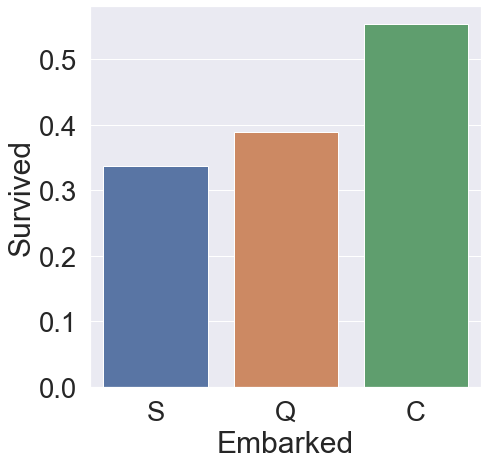

In [98]:
embarked_df = train[["Embarked", "Survived"]].groupby("Embarked").agg("mean").sort_values(
    by = "Survived")
plt.figure(figsize = (7,7))
sns.barplot(data = embarked_df, x = embarked_df.index, y = "Survived")

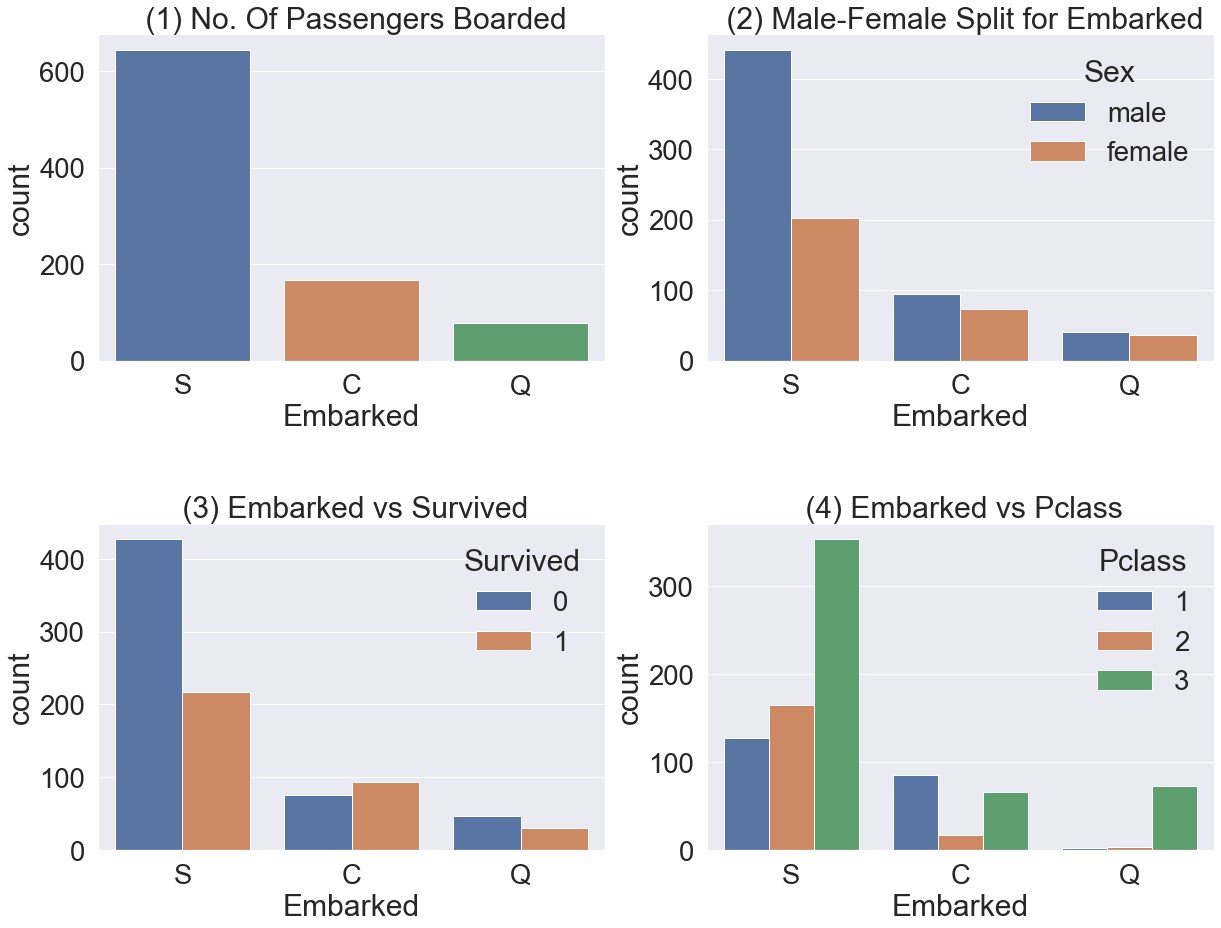

In [106]:
# fig.tight_layout() : 서브 플롯간에 올바른 간격 자동 유지
# plt.subplots_adjust() : 서브 플롯 간 간격을 변경
fig, ax = plt.subplots(2, 2, figsize = (20, 15))
sns.countplot("Embarked", data = train, ax = ax[0,0])
ax[0,0].set_title(" (1) No. Of Passengers Boarded")
sns.countplot("Embarked", hue = "Sex", data = train, ax = ax[0,1])
ax[0,1].set_title(" (2) Male-Female Split for Embarked")
sns.countplot("Embarked", hue = "Survived", data = train, ax = ax[1,0])
ax[1,0].set_title(" (3) Embarked vs Survived")
sns.countplot("Embarked", hue = "Pclass", data = train, ax = ax[1,1])
ax[1,1].set_title(" (4) Embarked vs Pclass")
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
# fig.tight_layout()
plt.show()

### 2.7 Family - SibSp(형제 자매) + Parch(부모, 자녀)

In [107]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [108]:
print("Maximum size of Family : ", train["FamilySize"].max())
print("Minimum size of Family : ", train["FamilySize"].min())

Maximum size of Family :  11
Minimum size of Family :  1


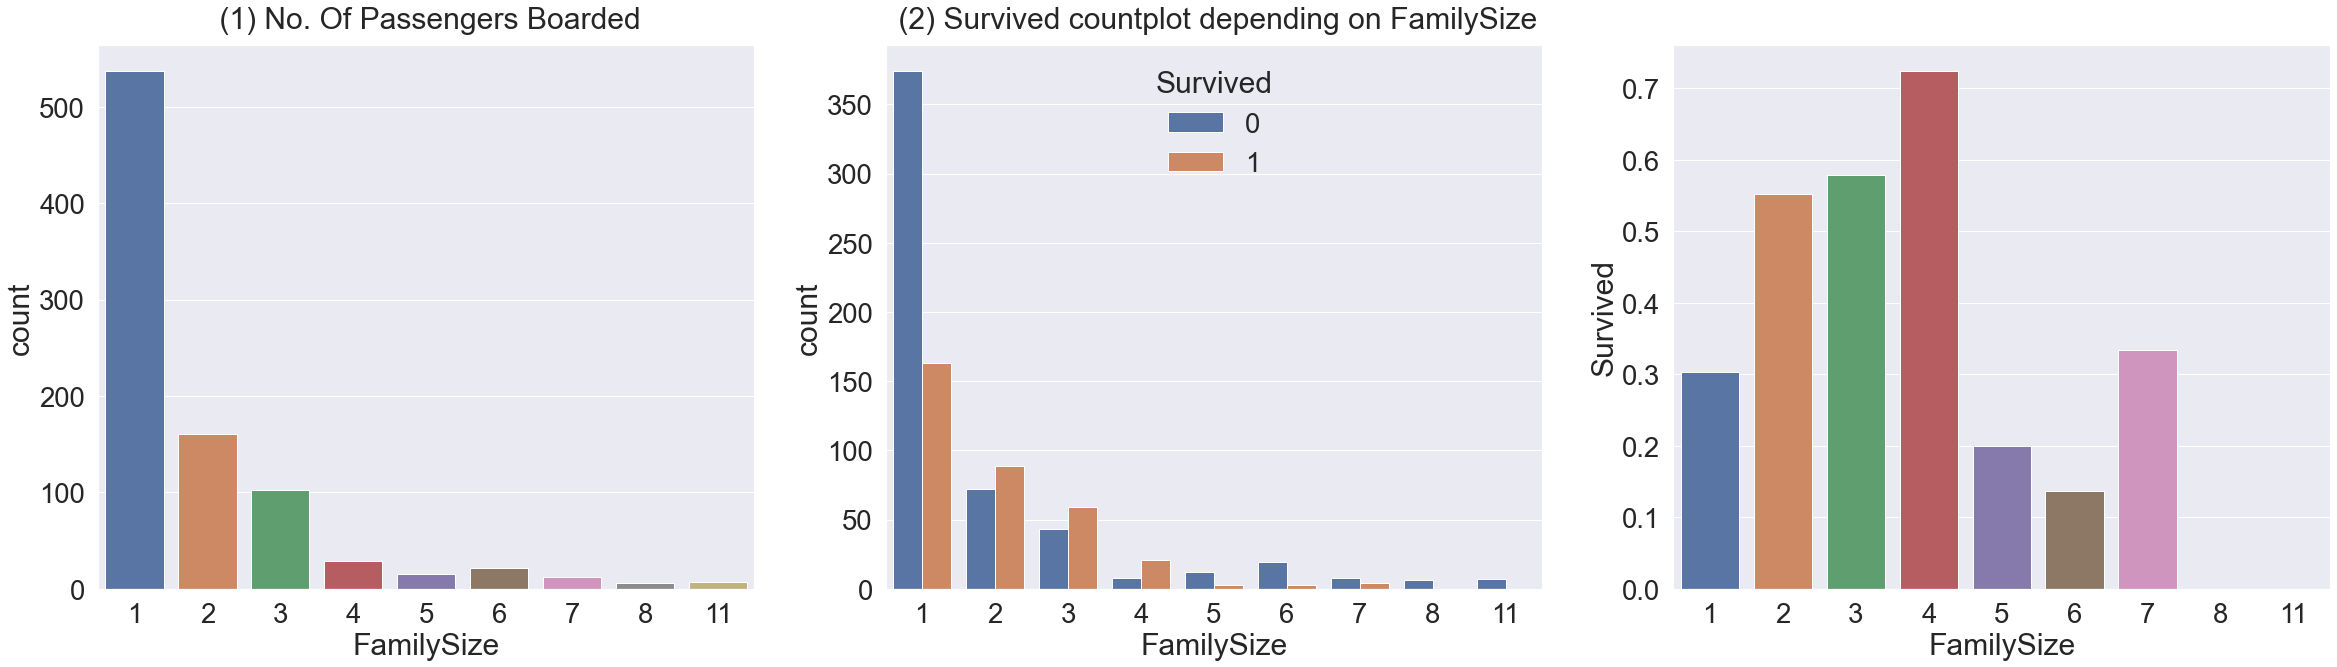

In [124]:
fig, ax = plt.subplots(1, 3, figsize = (40,10))
sns.countplot("FamilySize", data = train, ax = ax[0])
ax[0].set_title(" (1) No. Of Passengers Boarded", y = 1.02)

sns.countplot("FamilySize", hue = "Survived", data = train, ax = ax[1])
ax[1].set_title(" (2) Survived countplot depending on FamilySize", y = 1.02)

size_count_df = train[["FamilySize", "Survived"]].groupby("FamilySize", as_index = False).agg("mean").sort_values(by = "Survived", ascending = False)
sns.barplot(data = size_count_df, x = "FamilySize", y = "Survived")

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 2.8 Fare

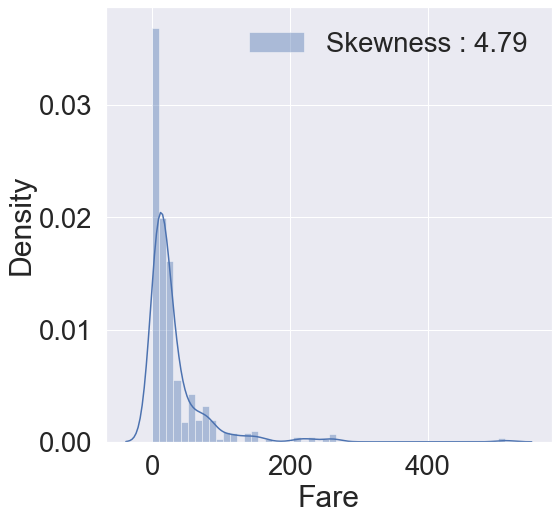

In [128]:
fig, ax = plt.subplots(1, 1, figsize = (8,8))
sns.distplot(train["Fare"], color = "b", label = "Skewness : {:.2f}".format(train["Fare"].skew()),
            ax=ax)
ax.legend(loc = "best")

In [129]:
test.loc[test.Fare.isnull(), "Fare"] = test["Fare"].mean()

train["Fare"] = train["Fare"].apply(lambda x: np.log(x) if x > 0 else 0)
test["Fare"] = test["Fare"].apply(lambda x: np.log(x) if x > 0 else 0)

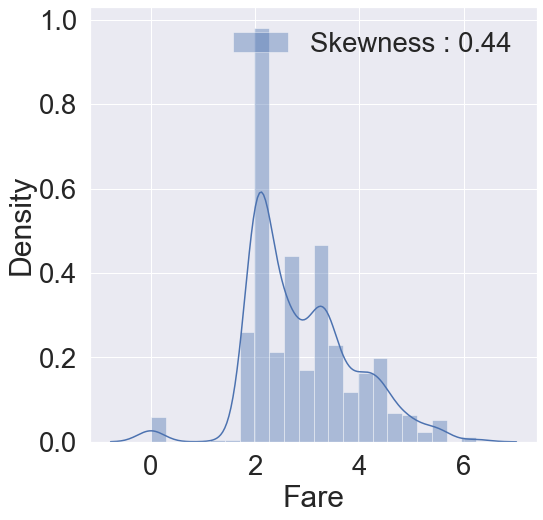

In [131]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.distplot(train['Fare'], color='b', label='Skewness : {:.2f}'.format(train['Fare'].skew()), ax=ax)
ax.legend(loc='best')